# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, Normalize
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Importing the dataset and analysing

In [2]:
data = pd.read_csv('regression_data.csv')
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [4]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [52]:
# bedrooms column
data['bedrooms'].value_counts()

3     8749
4     5429
2     2592
5     1061
1      170
6      170
7       20
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [53]:
# bathrooms column
data['bathrooms'].value_counts()

2.50    4491
1.00    3651
1.75    2734
2.00    1758
2.25    1756
1.50    1360
2.75     909
3.00     577
3.50     413
3.25     333
3.75      65
0.75      52
4.00      44
4.50      26
4.25      17
1.25       9
0.50       4
5.00       3
5.25       2
4.75       1
Name: bathrooms, dtype: int64

In [54]:
# floors column
data['floors'].value_counts()

1.0    9369
2.0    6453
1.5    1690
3.0     578
2.5     109
3.5       6
Name: floors, dtype: int64

In [55]:
# waterfront column
data['waterfront'].value_counts()

0    18146
1       59
Name: waterfront, dtype: int64

In [56]:
# view column
data['view'].value_counts()

0    16840
2      685
3      282
1      255
4      143
Name: view, dtype: int64

In [58]:
# grade column
data['grade'].value_counts()

7     8383
8     5305
6     1908
9     1863
10     467
5      210
11      46
4       21
3        1
12       1
Name: grade, dtype: int64

# Cleaning the dataset

In [5]:
# Checking for null values
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [6]:
#Checking for duplicates
data = data.drop_duplicates()
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [7]:
#Checking for outliers for a few columns and cleaning them

In [8]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [9]:
data = remove_outliers(data, threshold=1.5, in_columns=['sqft_living15','sqft_lot15','sqft_basement','sqft_above']) 
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


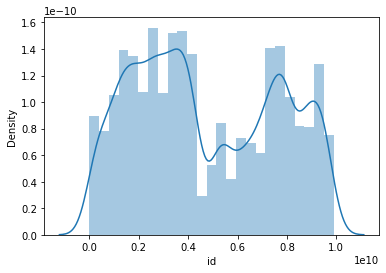

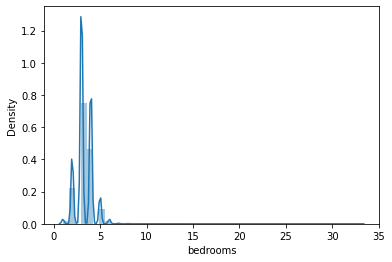

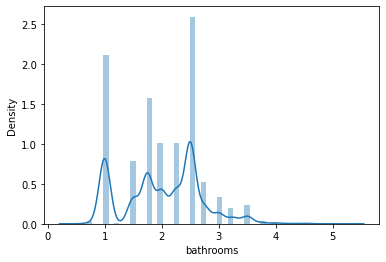

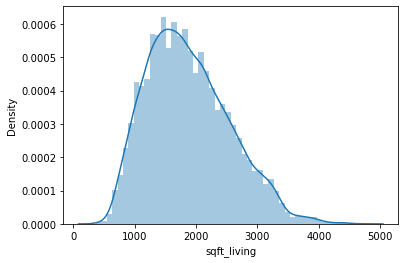

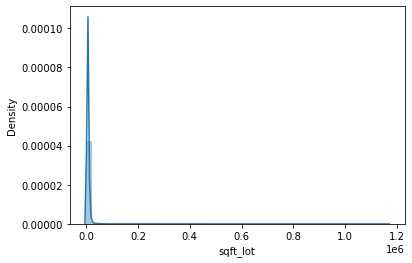

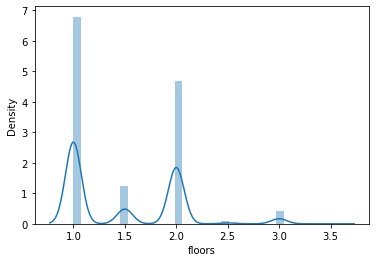

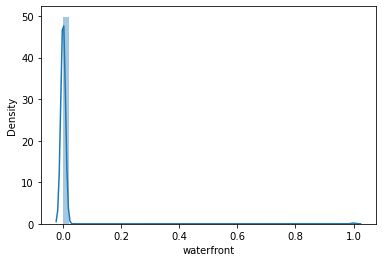

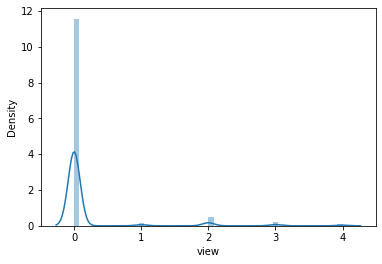

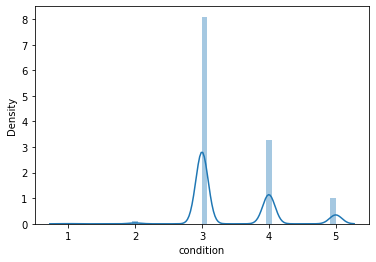

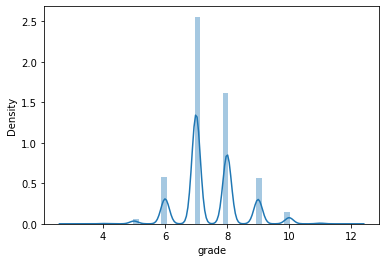

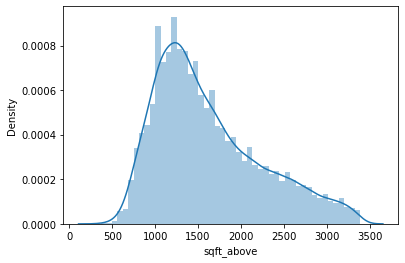

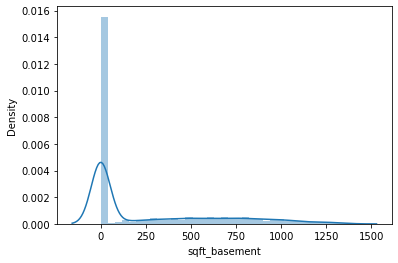

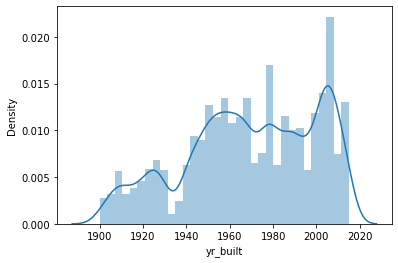

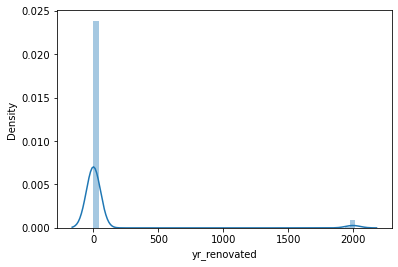

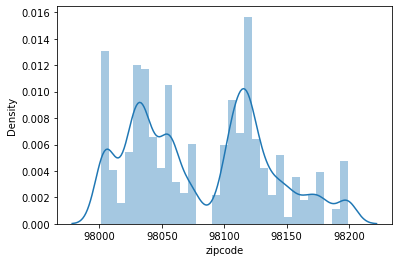

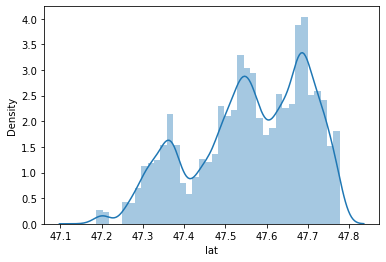

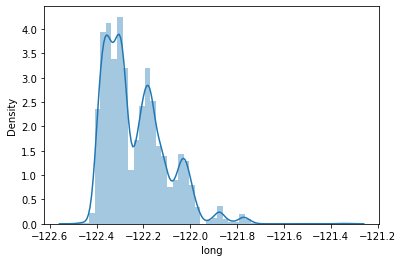

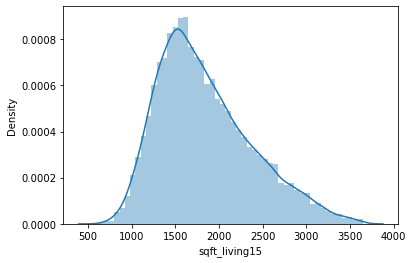

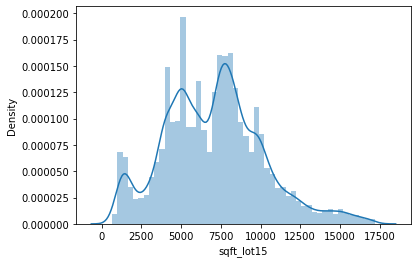

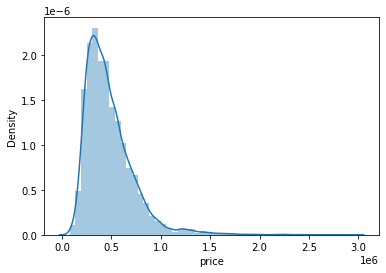

In [10]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

# Checking for correlation and dropping some columns (if necessary)

In [11]:
corr_data = data.select_dtypes([np.number])
correlations_matrix1 = corr_data.corr()
correlations_matrix1

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.006544,0.035910,0.036944,-0.041563,0.024523,0.005975,0.025074,-0.030093,0.045348,0.043495,-0.005943,0.038598,-0.012673,-0.034619,-0.007822,0.079263,0.041649,-0.054481,0.014986
bedrooms,0.006544,1.000000,0.468231,0.588589,0.046769,0.149625,-0.022912,0.035025,0.034263,0.295506,0.469838,0.275981,0.134679,0.024741,-0.147578,-0.040969,0.126393,0.357337,0.156719,0.248229
bathrooms,0.035910,0.468231,1.000000,0.706399,-0.024173,0.515995,0.021062,0.113360,-0.125088,0.600216,0.621071,0.236208,0.521946,0.054328,-0.194360,-0.011024,0.209975,0.504734,-0.054748,0.413157
sqft_living,0.036944,0.588589,0.706399,1.000000,0.060535,0.350227,0.038282,0.191129,-0.048313,0.673861,0.835327,0.407281,0.303407,0.061403,-0.174642,0.018149,0.206241,0.708241,0.164366,0.584965
sqft_lot,-0.041563,0.046769,-0.024173,0.060535,1.000000,-0.127213,0.022229,0.023113,0.013842,-0.000564,0.051099,0.023770,-0.034357,0.004845,-0.099178,-0.056471,0.105659,0.082828,0.342049,-0.003788
floors,0.024523,0.149625,0.515995,0.350227,-0.127213,1.000000,0.017825,0.019626,-0.263352,0.467647,0.540392,-0.269091,0.494559,0.014618,-0.052283,0.029377,0.109478,0.256670,-0.366559,0.255166
waterfront,0.005975,-0.022912,0.021062,0.038282,0.022229,0.017825,1.000000,0.329596,0.006910,0.035390,0.027251,0.023445,-0.019520,0.062657,0.035925,-0.010692,-0.010025,0.047604,0.065414,0.161712
view,0.025074,0.035025,0.113360,0.191129,0.023113,0.019626,0.329596,1.000000,0.029482,0.178711,0.090388,0.192916,-0.079321,0.099085,0.125184,0.022982,-0.102420,0.219965,0.072593,0.327025
condition,-0.030093,0.034263,-0.125088,-0.048313,0.013842,-0.263352,0.006910,0.029482,1.000000,-0.150245,-0.160790,0.180397,-0.356574,-0.061377,-0.003940,0.003213,-0.091844,-0.095523,0.124269,0.066483
grade,0.045348,0.295506,0.600216,0.673861,-0.000564,0.467647,0.035390,0.178711,-0.150245,1.000000,0.668499,0.099010,0.450222,0.020967,-0.155320,0.094993,0.150685,0.624871,0.027314,0.600465


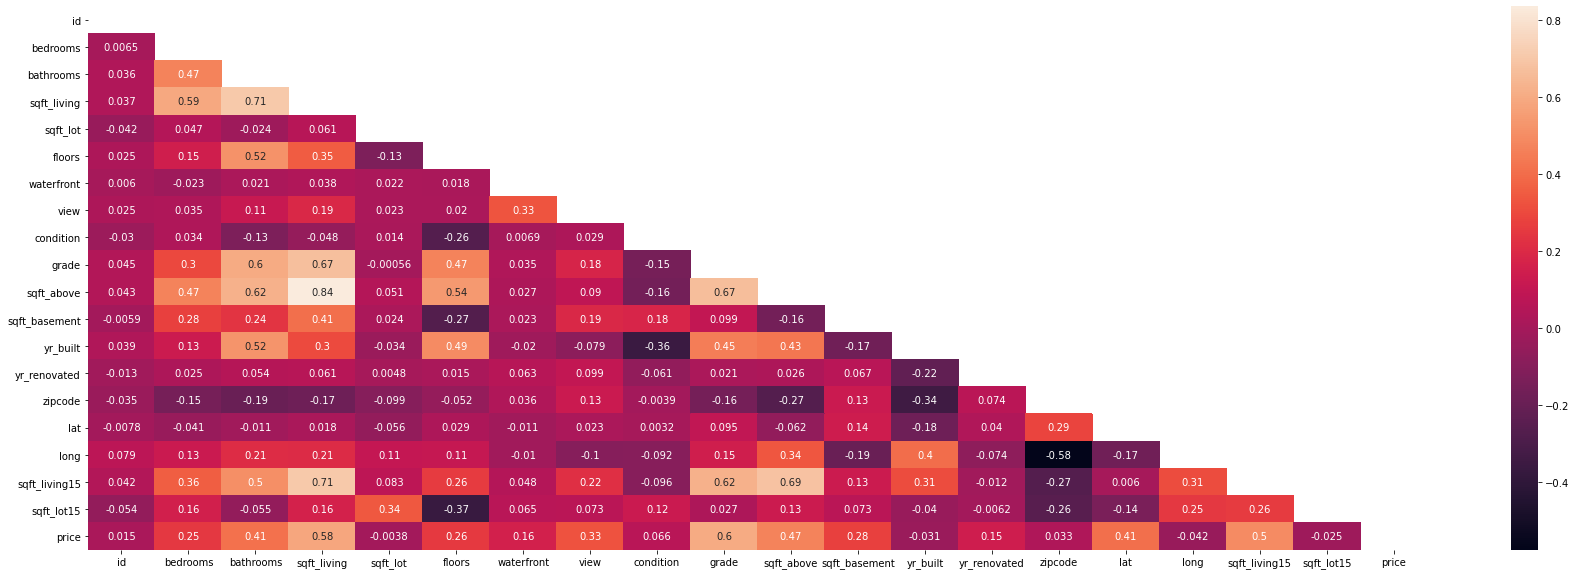

In [12]:
mask = np.zeros_like(correlations_matrix1)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(30, 10))
figure = sns.heatmap(correlations_matrix1, mask=mask, annot=True)
plt.savefig('hmap.png', dpi=400)
plt.show()

In [13]:
data = data.drop(['id', 'date','sqft_living','sqft_lot', 'condition','yr_built','yr_renovated','zipcode','lat','long','sqft_lot15'], axis = 1)
data

,bedrooms,bathrooms,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,0,0,7,1180,0,1340,221900
1,3,2.25,2.0,0,0,7,2170,400,1690,538000
2,2,1.00,1.0,0,0,6,770,0,2720,180000
3,4,3.00,1.0,0,0,7,1050,910,1360,604000
4,3,2.00,1.0,0,0,8,1680,0,1800,510000
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,8,1530,0,1530,360000
21593,4,2.50,2.0,0,0,8,2310,0,1830,400000
21594,2,0.75,2.0,0,0,7,1020,0,1020,402101
21595,3,2.50,2.0,0,0,8,1600,0,1410,400000


# Converting some columns' type from numerical to categorical

In [14]:
data = data.astype({"bedrooms": object, "bathrooms": object, "floors":object, "waterfront":object, "view":object, "grade":object})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18205 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       18205 non-null  object
 1   bathrooms      18205 non-null  object
 2   floors         18205 non-null  object
 3   waterfront     18205 non-null  object
 4   view           18205 non-null  object
 5   grade          18205 non-null  object
 6   sqft_above     18205 non-null  int64 
 7   sqft_basement  18205 non-null  int64 
 8   sqft_living15  18205 non-null  int64 
 9   price          18205 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.5+ MB


# Separating numerical and categorical columns for pre-processing

In [16]:
y = data['price']
X = data.drop(['price'], axis=1)

In [17]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [18]:
X_num

,sqft_above,sqft_basement,sqft_living15
0,1180,0,1340
1,2170,400,1690
2,770,0,2720
3,1050,910,1360
4,1680,0,1800
...,...,...,...
21592,1530,0,1530
21593,2310,0,1830
21594,1020,0,1020
21595,1600,0,1410


In [19]:
X_cat

,bedrooms,bathrooms,floors,waterfront,view,grade
0,3,1.0,1.0,0,0,7
1,3,2.25,2.0,0,0,7
2,2,1.0,1.0,0,0,6
3,4,3.0,1.0,0,0,7
4,3,2.0,1.0,0,0,8
...,...,...,...,...,...,...
21592,3,2.5,3.0,0,0,8
21593,4,2.5,2.0,0,0,8
21594,2,0.75,2.0,0,0,7
21595,3,2.5,2.0,0,0,8


# Encoding categorical columns

In [20]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [21]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [22]:
X = np.concatenate([X_num, encoded], axis=1)
X

array([[1180.,    0., 1340., ...,    0.,    0.,    0.],
       [2170.,  400., 1690., ...,    0.,    0.,    0.],
       [ 770.,    0., 2720., ...,    0.,    0.,    0.],
       ...,
       [1020.,    0., 1020., ...,    0.,    0.,    0.],
       [1600.,    0., 1410., ...,    0.,    0.,    0.],
       [1020.,    0., 1020., ...,    0.,    0.,    0.]])

# Fitting the model

## using non-normalized and one-hot encoded data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
predictions  = model.predict(X_test)
predictions.shape

(5462,)

In [26]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.5365206112661647, 167923.54249396228, 28198316123.721554)

## using normalized and one-hot encoded data

In [27]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(18205, 3)


In [28]:
x_normalized

array([[0.66088037, 0.        , 0.75049127],
       [0.7807473 , 0.14391655, 0.60804743],
       [0.27238426, 0.        , 0.96218855],
       ...,
       [0.70710678, 0.        , 0.70710678],
       [0.75024823, 0.        , 0.66115625],
       [0.70710678, 0.        , 0.70710678]])

In [47]:
X1 = np.concatenate([x_normalized, encoded], axis=1)
X1

array([[0.66088037, 0.        , 0.75049127, ..., 0.        , 0.        ,
        0.        ],
       [0.7807473 , 0.14391655, 0.60804743, ..., 0.        , 0.        ,
        0.        ],
       [0.27238426, 0.        , 0.96218855, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.70710678, 0.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       [0.75024823, 0.        , 0.66115625, ..., 0.        , 0.        ,
        0.        ],
       [0.70710678, 0.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ]])

In [48]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X1_train,y_train)

LinearRegression()

In [50]:
predictions  = model.predict(X1_test)
predictions.shape

(5462,)

In [51]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(-3.3082838120835e+21, 1.4187234743209856e+16, 2.0127762965894083e+32)